Name: Tarun Tanmay
Roll No: N049
Class: MBATech CE , 3 Year 

In [ ]:
#Experiment 6
#K nearest Neighbour
import pandas as pd
from math import sqrt 

In [ ]:
df_test=pd.read_csv('test_knn.csv')
df_test

,a,b,c
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [ ]:
#Definition for Euclidean Distance between two Points:
def euclidean_distance(row1,row2):
  distance=0.0
  ln=len(row1)
  for i in range(0,ln-1):
    temp1=(row1[i]-row2[i])**2
    distance=distance+temp1
  euc_distance=sqrt(distance)
  return euc_distance

In [ ]:
test_data=df_test.to_numpy()
#test_data
row0=test_data[0]
for row in test_data:
  distance=euclidean_distance(row0,row)
  print(distance)

0.0
1.3290173915275787
1.9494646655653247
1.559143938554055
0.5356280721938492
4.850940186986409
2.592833759950511
4.214227042632867
6.522409988228339
4.985585382449795


In [ ]:
def get_neighbors(train, test_row, num_neighbors):
  #initialising a list 
  dist=list()
  for train_row in train:
    edist=euclidean_distance(test_row,train_row)
    dist.append((train_row,edist))
  dist.sort(key=lambda tup:tup[1])

  neighbors=list()
  for i in range(num_neighbors):
    neighbors.append(dist[i][0])
  return neighbors, dist

In [ ]:
n,d= get_neighbors(test_data,test_data[0],3)
print('Distance \n')
print(d)
print('Neighbors: \n')
print(n)

Distance 

[(array([2.7810836, 2.550537 , 0.       ]), 0.0), (array([3.06407232, 3.00530597, 0.        ]), 0.5356280721938492), (array([1.46548937, 2.36212508, 0.        ]), 1.3290173915275787), (array([1.38807019, 1.85022032, 0.        ]), 1.559143938554055), (array([3.39656169, 4.40029353, 0.        ]), 1.9494646655653247), (array([5.33244125, 2.08862677, 1.        ]), 2.592833759950511), (array([6.92259672, 1.77106367, 1.        ]), 4.214227042632867), (array([7.62753121, 2.75926224, 1.        ]), 4.850940186986409), (array([7.67375647, 3.50856301, 1.        ]), 4.985585382449795), (array([ 8.67541865, -0.24206865,  1.        ]), 6.522409988228339)]
Neighbors: 

[array([2.7810836, 2.550537 , 0.       ]), array([3.06407232, 3.00530597, 0.        ]), array([1.46548937, 2.36212508, 0.        ])]


In [ ]:
#Predict based on the majority among neighbors
def predict_class(train, test_row,numb_n):
  neig,ecl_dis=get_neighbors(train,test_row,numb_n)
  output=[row[-1] for row in neig]
  pred=max(set(output), key=output.count)
  return pred

In [ ]:
pred_out=predict_class(test_data, test_data[8],5)
print('Expected Value: ',test_data[8][-1])
print('Got: ',pred_out)

Expected Value:  1.0
Got:  1.0


In [ ]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('iris_data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,4]

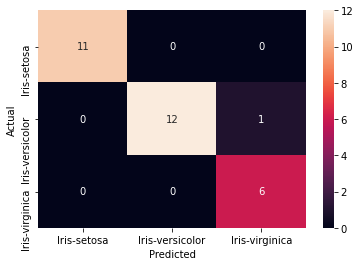

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=1)
#preprocess the data 
scaler=StandardScaler()
#scaler.fit converts p to q using q=(p-mean)/std
scaler.fit(X_train) 
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

In [ ]:
accuracy=27/30
accuracy

0.9

Conclusion: 
1) For the given data sets, K neighbors are chosen which are nearest to N data points. The euclidean distance is used to determine the distance between teh data points. It is shown that, predicted and actual values are same. 
2) iris flower, in Kn classifier sklearn library is used. 80 % of the data is used for training, and 20 % of the data is used for testing.  Before applying classifier, each independent variable is normalised to get uniform range. Confusion matrix shows that three data points are predicted wrong, therefore accuracy for the given data set is 90 percent.  